Loading data...
Processing 3036 files for class 'HIGH'...


Loading HIGH: 100%|██████████| 3036/3036 [00:31<00:00, 95.35file/s] 


Processing 2281 files for class 'LOW'...


Loading LOW: 100%|██████████| 2281/2281 [00:23<00:00, 98.14file/s] 


Processing 2295 files for class 'MEDIUM'...


Loading MEDIUM: 100%|██████████| 2295/2295 [00:23<00:00, 97.68file/s] 


Processing 3825 files for class 'VERY LOW'...


Loading VERY LOW: 100%|██████████| 3825/3825 [00:38<00:00, 98.62file/s] 


Loaded 11437 samples.
Train samples: 9149, Validation samples: 2288


Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 40, 300, 1)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 36, 296, 32)         │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 18, 148, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 14, 144, 64)         │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 7, 72, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 3, 68, 128)          │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 1, 34, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 4352)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │       1,114,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,372,420 (5.24 MB)

 Trainable params: 1,372,420 (5.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
286/286 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.5650 - loss: 2.1076 - val_accuracy: 0.7762 - val_loss: 0.5530
Epoch 2/30
286/286 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7939 - loss: 0.5215 - val_accuracy: 0.8247 - val_loss: 0.4297
Epoch 3/30
286/286 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8506 - loss: 0.3895 - val_accuracy: 0.8462 - val_loss: 0.4004
Epoch 4/30
286/286 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8728 - loss: 0.3190 - val_accuracy: 0.8099 - val_loss: 0.5421
Epoch 5/30
286/286 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8753 - loss: 0.3071 - val_accuracy: 0.8553 - val_loss: 0.3970
Epoch 6/30
286/286 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9105 - loss: 0.2450 - val_accuracy: 0.8531 - val_loss: 0.4087
Epoch 7/30
286/286 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9157 - loss: 0.2161 - val_accuracy: 0.8501 - val_loss: 0.4050
Epoch 8/30
286/286 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9325 - loss: 0.1737 - val_accu

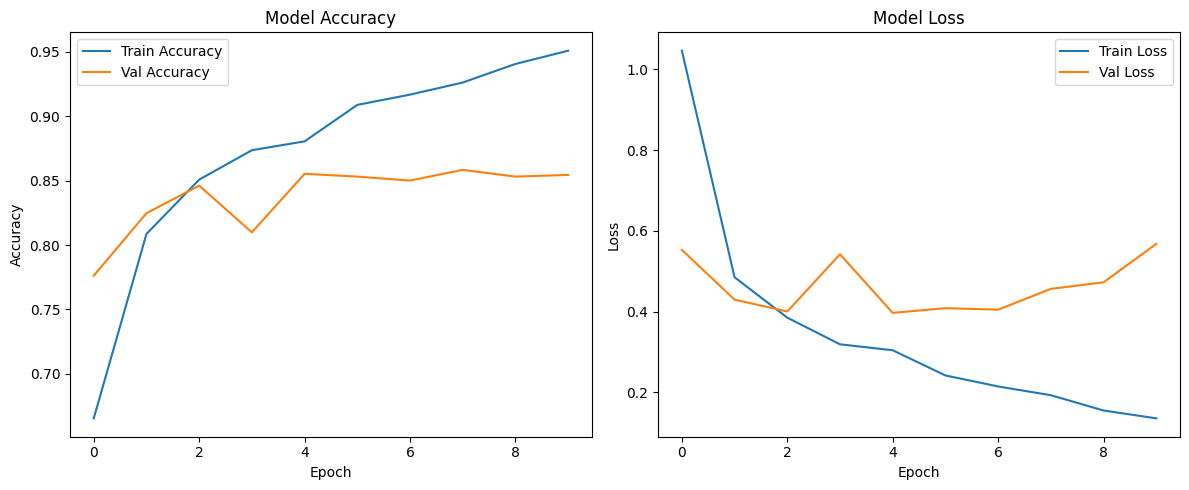

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


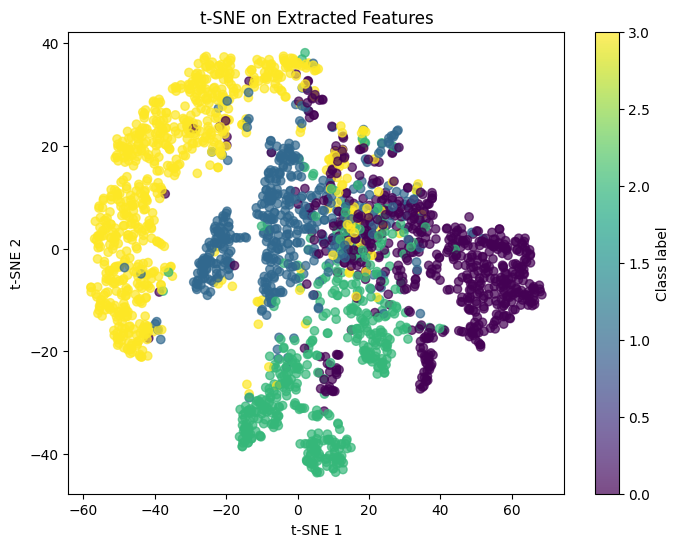

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


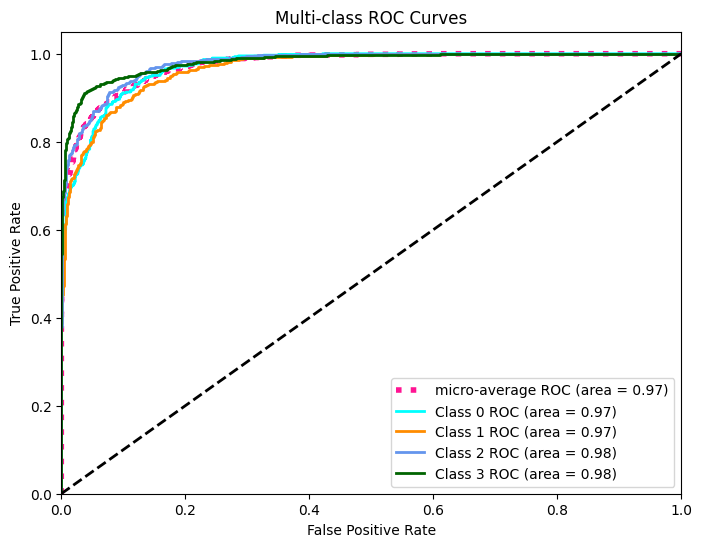

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

###############################
# 1. Data Loading & Feature Extraction with Progress Bar
###############################

def load_audio_files(root_dir, class_names, sr=44100, duration=2.0):
    """
    Load .wav files from subfolders and extract MFCC features.
    (Replace this section with your SECC extraction if needed.)

    :param root_dir: Root directory of the dataset.
    :param class_names: List of subfolder names representing classes.
    :param sr: Sampling rate for audio.
    :param duration: Duration (in seconds) to which each audio will be fixed.
    :return: Tuple (X, y) where X are features and y are labels.
    """
    X, y = [], []
    fixed_length = int(sr * duration)
    
    for label_idx, class_name in enumerate(class_names):
        class_path = os.path.join(root_dir, class_name)
        if not os.path.isdir(class_path):
            print(f"Warning: Folder {class_path} does not exist.")
            continue
        wav_files = [f for f in os.listdir(class_path) if f.lower().endswith('.wav')]
        print(f"Processing {len(wav_files)} files for class '{class_name}'...")
        for file_name in tqdm(wav_files, desc=f"Loading {class_name}", unit="file"):
            file_path = os.path.join(class_path, file_name)
            try:
                # Load audio with a fixed duration.
                audio, _ = librosa.load(file_path, sr=sr, duration=duration)
                if len(audio) < fixed_length:
                    audio = librosa.util.fix_length(data=audio, size=fixed_length)
                else:
                    audio = audio[:fixed_length]
                
                # --- Feature Extraction (using MFCC as an example) ---
                mfcc_features = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
                target_frames = 300
                if mfcc_features.shape[1] < target_frames:
                    mfcc_features = np.pad(mfcc_features,
                                           pad_width=((0, 0), (0, target_frames - mfcc_features.shape[1])),
                                           mode='constant')
                else:
                    mfcc_features = mfcc_features[:, :target_frames]
                
                # Reshape for CNN input: (height, width, channels)
                mfcc_features = np.expand_dims(mfcc_features, axis=-1)  # (40, 300, 1)
                X.append(mfcc_features)
                y.append(label_idx)
            except Exception as e:
                print(f"Error loading {file_path}: {e}")
    X = np.array(X)
    y = np.array(y)
    return X, y

# Define the dataset directory and class labels.
dataset_dir = "/kaggle/input/class-data/class-data"  # Adjust to your data path
class_labels = ["HIGH", "LOW", "MEDIUM", "VERY LOW"]

print("Loading data...")
X_data, y_data = load_audio_files(dataset_dir, class_labels, sr=44100, duration=2.0)
print(f"Loaded {len(X_data)} samples.")

###############################
# 2. Train/Test Split and Preprocessing
###############################

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data,
                                                  test_size=0.2,
                                                  random_state=42,
                                                  stratify=y_data)
print(f"Train samples: {len(X_train)}, Validation samples: {len(X_val)}")
num_classes = len(class_labels)
y_train_cat = to_categorical(y_train, num_classes)
y_val_cat = to_categorical(y_val, num_classes)

###############################
# 3. CNN Model Definition and Training (Functional API)
###############################

def create_cnn_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)
    # Convolutional Block 1
    x = layers.Conv2D(32, (5, 5), activation='relu')(inputs)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    # Convolutional Block 2
    x = layers.Conv2D(64, (5, 5), activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    # Convolutional Block 3
    x = layers.Conv2D(128, (5, 5), activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    # Flatten and Dense Layers
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

input_shape = X_train.shape[1:]  # e.g., (40, 300, 1)
model = create_cnn_model(input_shape, num_classes)
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

# Early stopping callback.
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train_cat,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_val, y_val_cat),
                    callbacks=[early_stop])

###############################
# 4. Visualization Functions
###############################

def plot_loss_accuracy(history):
    plt.figure(figsize=(12, 5))
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_tsne(features, labels, title='t-SNE Visualization'):
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(features)
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1],
                          c=labels, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter, label='Class label')
    plt.title(title)
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.show()

def plot_roc_curves(y_true, y_score, n_classes, title='ROC Curves'):
    y_true_bin = label_binarize(y_true, classes=range(n_classes))
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC (area = {0:0.2f})'.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)
    colors = ['aqua', 'darkorange', 'cornflowerblue', 'darkgreen']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='Class {0} ROC (area = {1:0.2f})'.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

###############################
# 5. Generate Visualizations
###############################

plot_loss_accuracy(history)

# --- Feature Extraction for t-SNE ---
# Here, we create a new model that outputs the penultimate dense layer.
# Since we are using the functional API, model.input is defined.
feature_extractor = models.Model(inputs=model.input, outputs=model.layers[-2].output)
features_val = feature_extractor.predict(X_val)
plot_tsne(features_val, y_val, title='t-SNE on Extracted Features')

# --- ROC Curves ---
y_val_pred = model.predict(X_val)
plot_roc_curves(y_val, y_val_pred, n_classes=num_classes, title='Multi-class ROC Curves')


Confusion Matrix:
[[564  15  11  18]
 [ 66 338  19  33]
 [ 68  16 361  14]
 [ 50  13   8 694]]

Classification Report:
              precision    recall  f1-score   support

        HIGH       0.75      0.93      0.83       608
         LOW       0.88      0.74      0.81       456
      MEDIUM       0.90      0.79      0.84       459
    VERY LOW       0.91      0.91      0.91       765

    accuracy                           0.86      2288
   macro avg       0.86      0.84      0.85      2288
weighted avg       0.86      0.86      0.86      2288



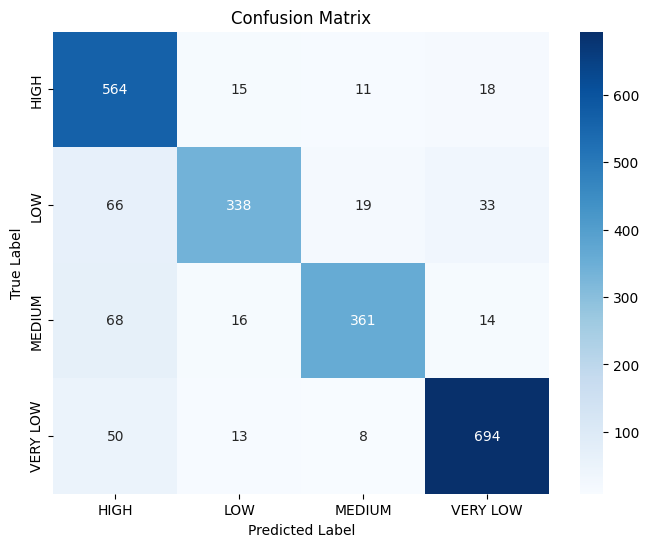

In [7]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assume y_val contains the integer labels and y_val_pred contains the predicted probabilities.
# Convert predictions from probabilities to predicted class indices.
y_pred = np.argmax(y_val_pred, axis=1)

# Compute the confusion matrix.
cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(cm)

# Print the classification report.
print("\nClassification Report:")
print(classification_report(y_val, y_pred, target_names=class_labels))

# Optionally, plot the confusion matrix as a heatmap.
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [8]:
# Save the trained model to an HDF5 file.
model.save("cnn_model.h5")
print("Model saved as cnn_model.h5")

# To load the model later, use:
# loaded_model = tf.keras.models.load_model("cnn_model.h5")
# print("Model loaded successfully")


Model saved as cnn_model.h5
